In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.DataFrame({
    'category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'subcategory': ['X', 'X', 'X', 'Y', 'Y', 'Y'],
    'data': [1, 2, 3, 4, 5, 6]
})


In [3]:
df

,category,subcategory,data
0,A,X,1
1,A,X,2
2,B,X,3
3,B,Y,4
4,C,Y,5
5,C,Y,6


In [4]:
df.groupby(by=['category', 'subcategory']).sum()

data
category subcategory      
A        X               3
B        X               3
         Y               4
C        Y              11

In [40]:
df['numeric_col1'] = [1, 2, 3, 4, 5, 6]
df['numeric_col2'] = [1, 2, 3, 4, 5, 6]
df['numeric_col3'] = [1, 2, 3, 4, 5, 6]

In [53]:
result = (df.groupby(by=["category", "subcategory"])
            [['category', 'numeric_col1', "numeric_col2", "numeric_col3"]]
            .agg({'category': 'count', 
                  'numeric_col1': ['mean', 'median'],
                  "numeric_col2": 'median',
                  "numeric_col3": ["sum", 
                                   lambda x: x.sum()/df['data'].sum()*100]
                 })
         )

In [54]:
df

,category,subcategory,data,numeric_col1,numeric_col2,numeric_col3
0,A,X,1,1,1,1
1,A,X,2,2,2,2
2,B,X,3,3,3,3
3,B,Y,4,4,4,4
4,C,Y,5,5,5,5
5,C,Y,6,6,6,6


In [55]:
result

category numeric_col1        numeric_col2 numeric_col3  \
                        count         mean median       median          sum   
category subcategory                                                          
A        X                  2          1.5    1.5          1.5            3   
B        X                  1          3.0    3.0          3.0            3   
         Y                  1          4.0    4.0          4.0            4   
C        Y                  2          5.5    5.5          5.5           11   

                                 
                     <lambda_0>  
category subcategory             
A        X            14.285714  
B        X            14.285714  
         Y            19.047619  
C        Y            52.380952

In [ ]:
# Rename the columns for clarity
result = result.rename(columns={'category_count': 'COUNT',
                                'numeric_col1_mean': 'AVG_NET_INCOME',
                                'NET_INCOME_std': 'STD_NET_INCOME',
                                'BIRTHYEAR_median': 'MEDIAN_BIRTHYEAR',
                                'PREVIOUS_REJECTION_COUNT_mean': "MEAN_COUNT_PREV_REJ",
                                'PREVIOUS_REJECTION_COUNT_median': "MEDIAN_COUNT_PREV_REJ",
                                'PREVIOUS_REJECTION_COUNT_sum': 'SUM_COUNT_PREV_REJ',
                                'PREVIOUS_REJECTION_COUNT_<lambda_0>': '%_PREV_REJ'})

# Round the NET_INCOME columns
result['AVG_NET_INCOME'] = result['AVG_NET_INCOME'].round(2)
result['STD_NET_INCOME'] = result['STD_NET_INCOME'].round(2)
result['%_PREV_REJ'] = result['%_PREV_REJ'].round(2)

# Convert MEDIAN_BIRTHYEAR to integer
result['MEDIAN_BIRTHYEAR'] = result['MEDIAN_BIRTHYEAR'].astype(int)
result

In [34]:
df.groupby(by=['category',"subcategory"]).mean()

data  numeric_col1  numeric_col2  numeric_col3
category subcategory                                                
A        X             1.5         0.150           1.5         0.450
B        X             3.0         0.100           1.0         0.450
         Y             4.0         0.300           3.0         0.440
C        Y             5.5         0.425           4.5         0.425

In [35]:
df

,category,subcategory,data,numeric_col1,numeric_col2,numeric_col3
0,A,X,1,0.10,1,0.45
1,A,X,2,0.20,2,0.45
2,B,X,3,0.10,1,0.45
3,B,Y,4,0.30,3,0.44
4,C,Y,5,0.40,4,0.43
5,C,Y,6,0.45,5,0.42


In [56]:
df.groupby(by='category').rolling(window='30D').mean()

ValueError: window must be an integer 0 or greater

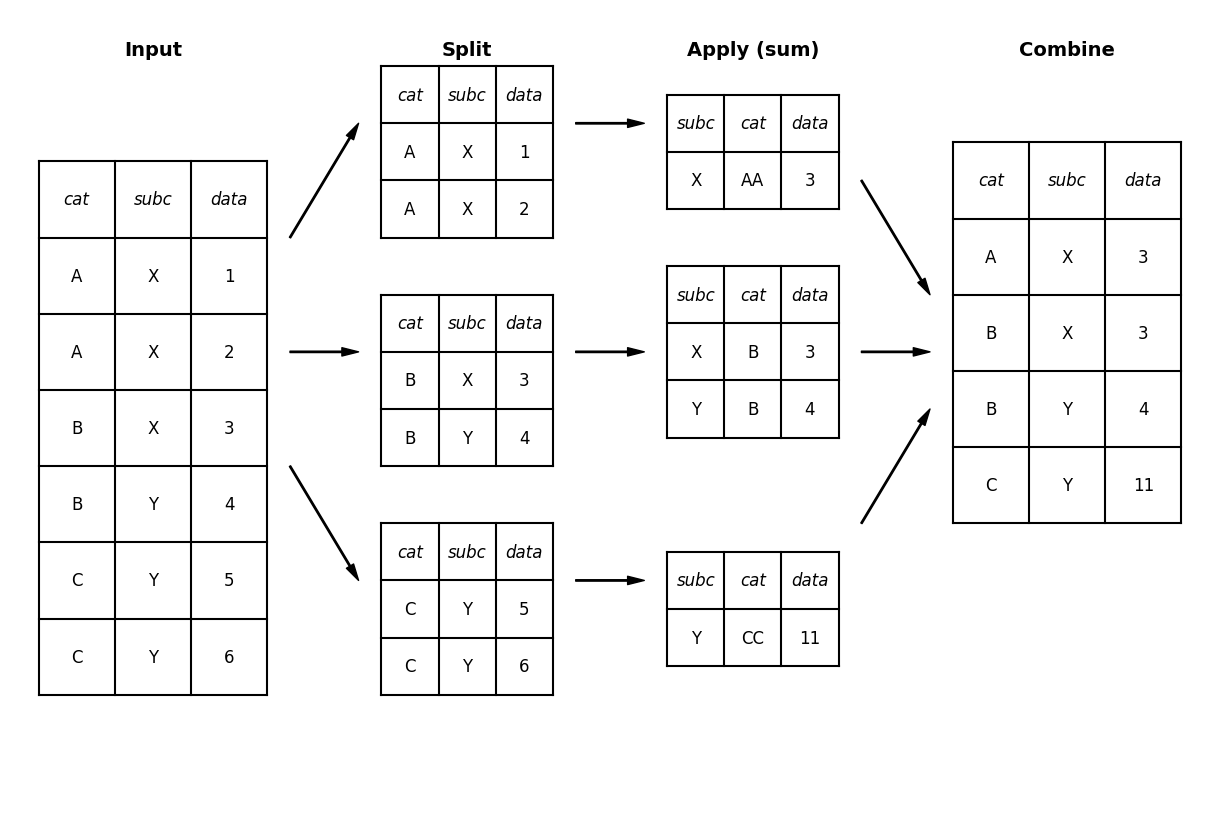

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None, show_index=True):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + (1 if show_index else 0)
    nrows = len(df.index) + 1

    dx = dy = width / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels if show_index is True
    if show_index:
        for i in range(nrows - 1):
            plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                     str(df.index[::-1][i]), **textstyle)

    # Create column labels
    col_offset = 1 if show_index else 0
    for i in range(ncols - col_offset):
        plt.text(x + (i + col_offset + 0.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)
        
    # Add index label if show_index is True
    if show_index and df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - col_offset):
            plt.text(x + (j + col_offset + 0.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)

# Create the DataFrame with abbreviated column names
df = pd.DataFrame({
    'cat': ['A', 'A', 'B', 'B', 'C', 'C'],
    'subc': ['X', 'X', 'X', 'Y', 'Y', 'Y'],
    'data': [1, 2, 3, 4, 5, 6]
})

# Perform groupby operation
result = df.groupby(by=['cat', 'subc']).sum()

# Create the plot
fig = plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes([0, 0, 1, 1])
ax.axis('off')

# Draw input DataFrame
draw_dataframe(df, [0, 0], width=2, show_index=False)

# Draw split DataFrames
y_positions = [4, 2, 0]
for i, (name, group) in enumerate(df.groupby('cat')):
    draw_dataframe(group.reset_index(drop=True), [3, y_positions[i]], width=1.5, show_index=False)

# Draw apply step (sum operation)
y_positions = [4.25, 2.25, 0.25]
for i, (name, group) in enumerate(df.groupby('cat')):
    sum_df = group.groupby('subc').sum().reset_index()
    draw_dataframe(sum_df, [5.5, y_positions[i]], width=1.5, show_index=False)

# Draw combined result
draw_dataframe(result.reset_index(), [8, 1.5], width=2, show_index=False)

# Add labels
style = dict(fontsize=14, ha='center', weight='bold')
plt.text(1, 5.6, "Input", **style)
plt.text(3.75, 5.6, "Split", **style)
plt.text(6.25, 5.6, "Apply (sum)", **style)
plt.text(9, 5.6, "Combine", **style)

# Add arrows
arrowprops = dict(facecolor='black', width=1, headwidth=6)
plt.annotate('', (2.8, 5), (2.2, 4), arrowprops=arrowprops)
plt.annotate('', (2.8, 3), (2.2, 3), arrowprops=arrowprops)
plt.annotate('', (2.8, 1), (2.2, 2), arrowprops=arrowprops)

plt.annotate('', (5.3, 5), (4.7, 5), arrowprops=arrowprops)
plt.annotate('', (5.3, 3), (4.7, 3), arrowprops=arrowprops)
plt.annotate('', (5.3, 1), (4.7, 1), arrowprops=arrowprops)

plt.annotate('', (7.8, 3.5), (7.2, 4.5), arrowprops=arrowprops)
plt.annotate('', (7.8, 3), (7.2, 3), arrowprops=arrowprops)
plt.annotate('', (7.8, 2.5), (7.2, 1.5), arrowprops=arrowprops)

plt.axis('equal')
plt.ylim(-1, 6)
plt.show()

In [6]:
df.groupby(by=['cat', 'subc']).sum()

data
cat subc      
A   X        3
B   X        3
    Y        4
C   Y       11

In [38]:
fig.savefig('../cat-subc-split-apply-combine.png')

In [26]:
df

,cat,subc,data
0,A,X,1
1,A,X,2
2,B,X,3
3,B,Y,4
4,C,Y,5
5,C,Y,6


In [18]:
df.groupby(by=['cat',"subc"]).mean()

data
cat subc      
A   X      1.5
B   X      3.0
    Y      4.0
C   Y      5.5

In [25]:
df.groupby(by=['cat','subc']).transform(lambda x: x - x.mean())

,data
0,-0.5
1,0.5
2,0.0
3,0.0
4,-0.5
5,0.5


----

Give me an example for advanced usage of the pandas groupby mehtod

Certainly! I'll provide you with an advanced example of using the pandas `groupby` method along with some other powerful features. This example will demonstrate how to perform complex aggregations and transformations on a dataset.



```python
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(0)
data = {
    'date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
    'category': np.random.choice(['A', 'B', 'C'], size=365),
    'product': np.random.choice(['X', 'Y', 'Z'], size=365),
    'sales': np.random.randint(100, 1000, size=365),
    'returns': np.random.randint(0, 50, size=365)
}

df = pd.DataFrame(data)

# 1. Multiple aggregations with custom functions
def net_sales(x):
    return x['sales'].sum() - x['returns'].sum()

result = df.groupby(['category', 'product']).agg({
    'sales': ['sum', 'mean', 'median'],
    'returns': ['sum', 'mean'],
    'date': ['min', 'max']
}).assign(net_sales=lambda x: x['sales']['sum'] - x['returns']['sum'])

print("1. Multiple aggregations with custom functions:")
print(result.head())
print("\n")

# 2. Using transform for percentage of total
total_sales = df['sales'].sum()
df['sales_pct'] = df.groupby('category')['sales'].transform(lambda x: x / total_sales * 100)

print("2. Percentage of total sales by category:")
print(df.groupby('category')['sales_pct'].mean())
print("\n")

# 3. Rolling window calculations
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

rolling_avg = df.groupby('category')['sales'].rolling(window='30D').mean().reset_index()
rolling_avg = rolling_avg.rename(columns={'sales': 'rolling_avg_sales'})

print("3. 30-day rolling average sales by category:")
print(rolling_avg.head(10))
print("\n")

# 4. Groupby with pivot and unstack
pivot_table = df.pivot_table(
    values='sales', 
    index=['category', pd.Grouper(freq='M')],
    columns='product',
    aggfunc='sum',
    fill_value=0
).unstack(level=0)

print("4. Monthly sales pivot table:")
print(pivot_table.head(10))
print("\n")

# 5. Complex filtering based on group properties
def top_n_products(group, n=2):
    return group.nlargest(n, 'sales')

top_products = df.groupby('category').apply(top_n_products)

print("5. Top 2 products by sales in each category:")
print(top_products)

```

This advanced example demonstrates several powerful uses of the pandas `groupby` method along with other related functions. Here's a breakdown of what each section does:

1. Multiple aggregations with custom functions: This shows how to perform various aggregations on different columns simultaneously, including a custom net sales calculation.

2. Using transform for percentage of total: This demonstrates how to calculate the percentage of total sales for each category using the `transform` method.

3. Rolling window calculations: This section shows how to perform time-based rolling window calculations within groups.

4. Groupby with pivot and unstack: This creates a pivot table of monthly sales by category and product, then unstacks it for a different view of the data.

5. Complex filtering based on group properties: This example shows how to apply a custom function to each group to select the top N products by sales.

Each of these examples showcases different advanced techniques you can use with pandas `groupby`. They demonstrate how to combine `groupby` with other pandas functions to perform complex data manipulations and analyses.

Would you like me to explain any of these examples in more detail?

In [57]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(0)
data = {
    'date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
    'category': np.random.choice(['A', 'B', 'C'], size=365),
    'product': np.random.choice(['X', 'Y', 'Z'], size=365),
    'sales': np.random.randint(100, 1000, size=365),
    'returns': np.random.randint(0, 50, size=365)
}

df = pd.DataFrame(data)

# 1. Multiple aggregations with custom functions
def net_sales(x):
    return x['sales'].sum() - x['returns'].sum()

result = df.groupby(['category', 'product']).agg({
    'sales': ['sum', 'mean', 'median'],
    'returns': ['sum', 'mean'],
    'date': ['min', 'max']
}).assign(net_sales=lambda x: x['sales']['sum'] - x['returns']['sum'])

print("1. Multiple aggregations with custom functions:")
print(result.head())
print("\n")

# 2. Using transform for percentage of total
total_sales = df['sales'].sum()
df['sales_pct'] = df.groupby('category')['sales'].transform(lambda x: x / total_sales * 100)

print("2. Percentage of total sales by category:")
print(df.groupby('category')['sales_pct'].mean())
print("\n")

# 3. Rolling window calculations
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

rolling_avg = df.groupby('category')['sales'].rolling(window='30D').mean().reset_index()
rolling_avg = rolling_avg.rename(columns={'sales': 'rolling_avg_sales'})

print("3. 30-day rolling average sales by category:")
print(rolling_avg.head(10))
print("\n")

# 4. Groupby with pivot and unstack
pivot_table = df.pivot_table(
    values='sales', 
    index=['category', pd.Grouper(freq='M')],
    columns='product',
    aggfunc='sum',
    fill_value=0
).unstack(level=0)

print("4. Monthly sales pivot table:")
print(pivot_table.head(10))
print("\n")

# 5. Complex filtering based on group properties
def top_n_products(group, n=2):
    return group.nlargest(n, 'sales')

top_products = df.groupby('category').apply(top_n_products)

print("5. Top 2 products by sales in each category:")
print(top_products)

1. Multiple aggregations with custom functions:
                  sales                    returns                  date  \
                    sum        mean median     sum       mean        min   
category product                                                           
A        X        23858  568.047619  626.0     974  23.190476 2023-01-21   
         Y        19682  531.945946  584.0     915  24.729730 2023-01-03   
         Z        29061  581.220000  609.5    1134  22.680000 2023-01-01   
B        X        18782  536.628571  509.0     869  24.828571 2023-01-04   
         Y        22452  498.933333  494.0     990  22.000000 2023-01-19   

                            net_sales  
                        max            
category product                       
A        X       2023-12-27     22884  
         Y       2023-12-02     18767  
         Z       2023-12-28     27927  
B        X       2023-12-25     17913  
         Y       2023-12-30     21462  


2. Percentage of tota